In [104]:
'''
Girish Rajani-Bathija
A20503736
CS 577 - F22
Assignment 5 IMDB Classification
'''

from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM
import matplotlib.pyplot as plt
import os
import numpy as np

In [91]:
max_features = 10000 #number of words to consider as features
maxlen = 20 #cuts of text after 20 words 

#load the data as list of integers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=max_features)

train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

#Create validation set from training data
x_val = train_data[:5000]
partial_train_data = train_data[5000:]
y_val = train_labels[:5000]
partial_train_labels = train_labels[5000:]

In [117]:
print('Training data samples:',len(partial_train_data))
print('Validation data samples:',len(x_val))
print('Testing data samples:',len(test_data))

Training data samples: 20000
Validation data samples: 5000
Testing data samples: 25000


In [93]:
#Build the network
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 20, 100)           1000000   
                                                                 
 flatten_12 (Flatten)        (None, 2000)              0         
                                                                 
 dense_24 (Dense)            (None, 16)                32016     
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,032,033
Trainable params: 1,032,033
Non-trainable params: 0
_________________________________________________________________
None


In [94]:
#Compile and train the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_train_data, partial_train_labels,
epochs=10, batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5652 - acc: 0.6948 - val_loss: 0.4871 - val_acc: 0.7570
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3822 - acc: 0.8299 - val_loss: 0.5085 - val_acc: 0.7502
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2425 - acc: 0.9039 - val_loss: 0.6079 - val_acc: 0.7368
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1346 - acc: 0.9528 - val_loss: 0.7508 - val_acc: 0.7270
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0681 - acc: 0.9783 - val_loss: 0.9514 - val_acc: 0.7044
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0339 - acc: 0.9898 - val_loss: 1.1746 - val_acc: 0.6996
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0163 - acc: 0.9956 - val_loss: 1.3955 - val_acc: 0.6958
Epoch 8/10
625/625 [==============================] - 3s 4ms/step - loss: 0.

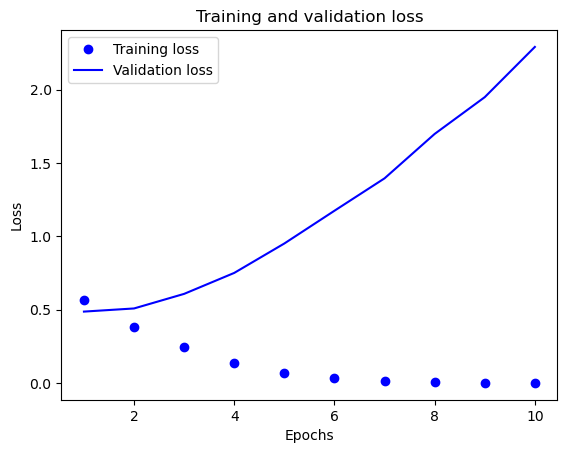

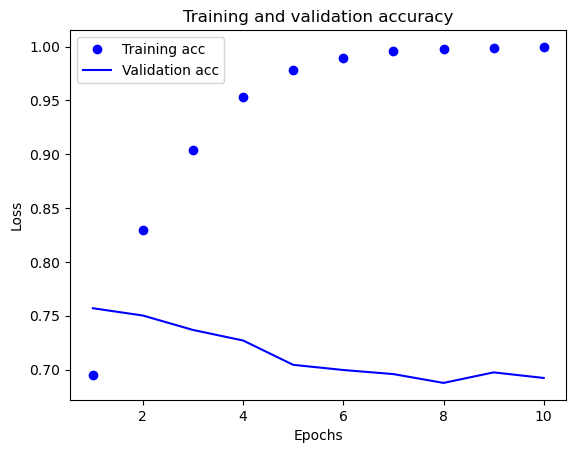

In [95]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
#Evaluate accuracy of model on test data
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.3817713260650635
Test accuracy: 0.6732000112533569


In [97]:
# Parsing the GloVe word-embeddings file

glove_dir = 'D:/Users/giris/Downloads/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [98]:
# Preparing the GloVe word-embeddings matrix
embedding_dim = 100
max_words=10000
word_index = imdb.get_word_index()

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [100]:
#Use the same model as before
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Loading pretrained word embeddings into the Embedding layer and freeze the weights
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 20, 100)           1000000   
                                                                 
 flatten_14 (Flatten)        (None, 2000)              0         
                                                                 
 dense_28 (Dense)            (None, 16)                32016     
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,032,033
Trainable params: 32,033
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [101]:
#Compile and train the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_train_data, partial_train_labels,
epochs=10, batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6948 - acc: 0.5176 - val_loss: 0.6868 - val_acc: 0.5400
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6753 - acc: 0.5727 - val_loss: 0.6938 - val_acc: 0.5500
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6541 - acc: 0.6037 - val_loss: 0.6780 - val_acc: 0.5698
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6270 - acc: 0.6401 - val_loss: 0.7013 - val_acc: 0.5472
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5996 - acc: 0.6680 - val_loss: 0.7358 - val_acc: 0.5668
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5655 - acc: 0.6926 - val_loss: 0.6991 - val_acc: 0.5736
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5270 - acc: 0.7273 - val_loss: 0.7506 - val_acc: 0.5748
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

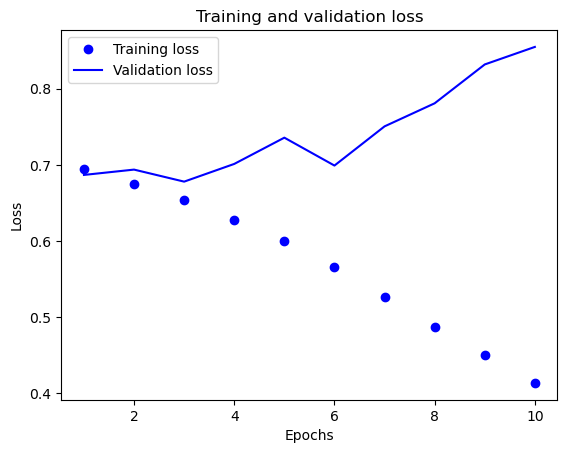

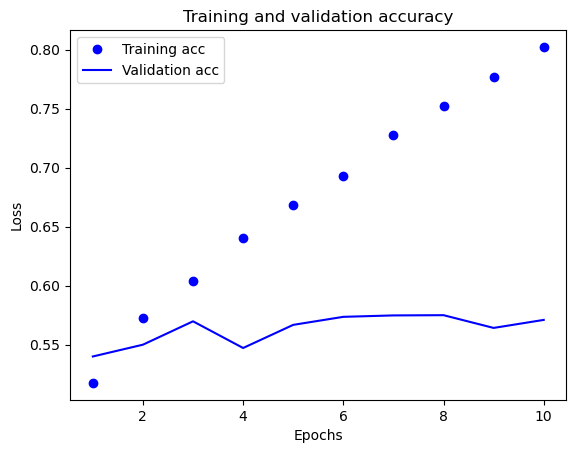

In [102]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
#Evaluate model on test data
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.8738839626312256
Test accuracy: 0.5623199939727783


In [108]:
#Training by now replacing the fully connected layer with an LSTM layer
#Use the same model as before
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
#Change the fully connected layer to a LSTM layer:
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

#Loading pretrained word embeddings into the Embedding layer and freeze the weights
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

print(model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 20, 100)           1000000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 flatten_18 (Flatten)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,042,305
Trainable params: 42,305
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [109]:
#Compile and train the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_train_data, partial_train_labels,
epochs=10, batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 10s 9ms/step - loss: 0.6797 - acc: 0.5612 - val_loss: 0.6529 - val_acc: 0.6060
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6403 - acc: 0.6197 - val_loss: 0.6250 - val_acc: 0.6360
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.6096 - acc: 0.6544 - val_loss: 0.6271 - val_acc: 0.6244
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 0.5808 - acc: 0.6791 - val_loss: 0.5920 - val_acc: 0.6702
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5527 - acc: 0.7053 - val_loss: 0.5771 - val_acc: 0.6848
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5258 - acc: 0.7266 - val_loss: 0.5682 - val_acc: 0.6990
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5008 - acc: 0.7425 - val_loss: 0.5968 - val_acc: 0.6680
Epoch 8/10
625/625 [==============================] - 4s 7ms/step - loss: 0

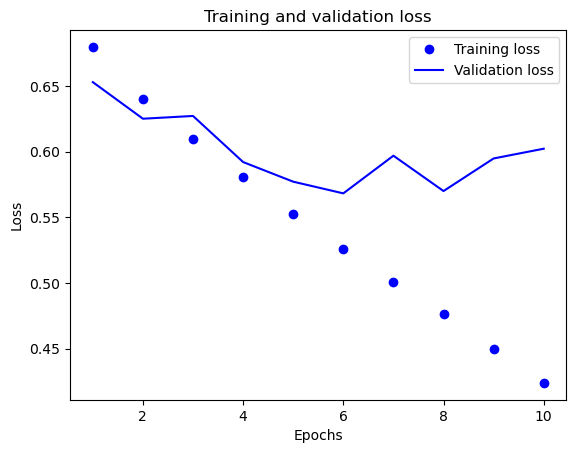

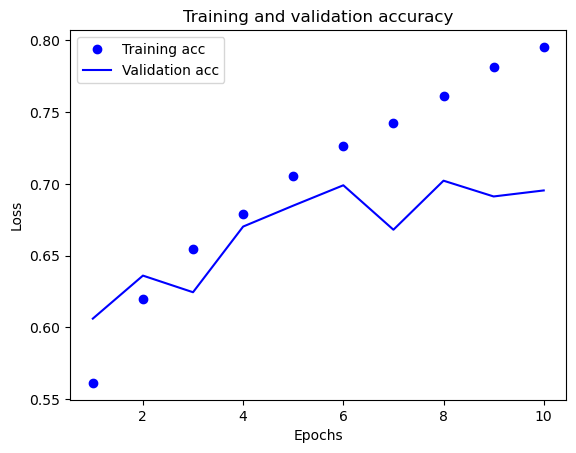

In [110]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [111]:
#Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6110551357269287
Test accuracy: 0.6942399740219116
